While there’s less rhyme or reason to the rate at which teams convert those scoring chances into goals, modern analysis has ascertained that possession plays a big role in creating offensive opportunities, and that effective short passing — **fueled largely by having pass targets move to soft spots in the defense before ever receiving the ball** — is strongly associated with building and maintaining possession.

• We could try to identify the weakest link on each team, or suggest trades that would make a team much better by focusing on the weaker players than the superstars.

• We could show that the superstars' salaries would be better spent on improving two or three cheaper players who would make the team better as a whole.

• We could build a "team builder" tool that helps players in Fifa 19 who want to create a custom team figure out which players to pick to create the best overall team given a salary cap

**MVP** = a model to find weakest for any team and provide suggestion on players to trade for to improve team

**Stretch goal** = dinamic model that displays weakest link of letting team of players' chosen by user

**Provide Vu:** Reduced number of columns to show

• Player profile (name, age, height, weight, nationality, picture)

• 6 to 8 features for users to see per player

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df_ratings = pd.read_csv('Fifa19_TeamRatings.csv')

**Column info:**

Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Relea

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df.shape

(18207, 88)

In [9]:
df.Special.value_counts()

1745    47
1628    46
1728    46
1655    42
1740    42
1667    41
1649    41
1691    41
1599    40
1694    40
1748    40
1638    40
1620    40
1713    39
1575    39
1833    39
1679    38
1683    38
1448    38
1749    38
1693    38
1800    38
1680    38
1760    38
1763    38
1651    37
1543    37
1813    37
1565    36
1625    36
1781    36
1724    36
1739    36
1792    36
1588    36
1719    36
1617    36
1815    36
1511    35
1611    35
1650    35
1587    35
1696    35
1632    35
1711    35
1647    35
1802    35
1612    35
1668    35
1633    35
1675    35
1535    35
1770    34
1648    34
1686    34
1701    34
1669    34
1772    34
1723    34
1684    34
1759    34
1692    34
1698    34
1670    34
1699    34
1731    34
1707    33
1527    33
1705    33
1823    33
1817    33
1690    33
1593    32
1790    32
1762    32
1782    32
1808    32
1766    32
1597    32
1676    32
1758    32
1708    32
1700    32
1738    32
1706    32
1626    32
1610    32
1542    32
1541    32
1630    32
1662    32

In [10]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [11]:
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [12]:
# Count of Goal Keepers
(df['Position'] == 'GK').sum()

2025

In [13]:
# Unique Clubs in df
df['Club'].nunique()

651

In [14]:
df_ratings.head()

,Name,League,ATTACK,MIDFIELD,DEFENCE,OVERALL
0,FC Barcelona,LaLiga Santander,87,85,85,86
1,Real Madrid,LaLiga Santander,83,88,84,86
2,FC Bayern,Bundesliga,90,84,85,85
3,Juventus,Serie A TIM,89,83,85,85
4,Manchester City,Premier League,86,88,83,85


In [15]:
df_ratings.shape

(652, 6)

## Grouping Players Dataset by Teams

In [16]:
df_teams = df

### Dropping NaNs in `Club` and `Position` Features

In [17]:
df_teams = df_teams.dropna(subset=['Club', 'Position'], axis=0)

In [18]:
# 651 Teams
len(df_teams['Club'].value_counts(dropna=False))

651

### Goal Keeper rows: Replacing NaNs with 0s in `Position` Column

In [19]:
# Count of Goal Keepers
(df_teams['Position'] == 'GK').sum()

1992

In [20]:
# Rapacing NaNs with 0s for Goal Keeper rows
df_teams.iloc[:,27:53] = df_teams.iloc[:,27:53].fillna(value=0)

C:\Users\jhump\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Dropping `Joined` and Replacing NaNs in `Release Clause` and `Loaned From`

In [21]:
# Dropping 'Joined' column
df_teams = df_teams.drop('Joined', axis=1)

In [22]:
# Replacing NaNs in 'Release Clause' and 'Loaned From' features
df_teams['Release Clause'] = df_teams['Release Clause'].fillna(0)
df_teams['Loaned From'] = df_teams['Loaned From'].fillna('Not Loaned')

In [23]:
df_teams.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW        

### Adding `Field Position` Feature

In [24]:
# Positions to Clasiffy as Goal Keeper, Attack, Midfield, or Defence
df_teams['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [25]:
defense = ['CB', 'RB', 'LB', 'RWB', 'LWB', 'RCB', 'LCB']
midfield = ['RW', 'LW', 'RM', 'LM', 'CM', 'CDM', 'CAM', 'RCM', 'LCM', 'LAM', 'RAM', 'RDM', 'LDM']
attack = ['ST', 'CF', 'RF', 'LF', 'RS', 'LS']
goalkeeper = ['GK']

In [26]:
# function to create Field Position for each player
def field(row):
    if row['Position'] in defense:
        val = 'Defense'
    elif row['Position'] in midfield:
        val = 'Midfield'
    elif row['Position'] in attack:
        val = 'Attack'
    else:
        val = 'GK'
    return val

In [27]:
df_teams['Field Position'] = df_teams.apply(field, axis=1)

In [28]:
df_teams.shape

(17918, 88)

### Editing values in `Value` and `Wage` columns

In [29]:
df_teams['Value'] = df_teams['Value'].astype(str)

In [30]:
def change_value(row):
    if (row['Value'][-1]=='K'):
        return int(pd.to_numeric(row['Value'][1:-1])*1000)
    elif (row['Value'][-1]=='M'):
        return int(pd.to_numeric(row['Value'][1:-1])*1000000)
    elif (row['Value'][-1]=='0'):
        return 0

In [31]:
df_teams['Value'] = df_teams.apply(change_value, axis=1)

In [32]:
df_teams['Value'].head()

0    110500000
1     77000000
2    118500000
3     72000000
4    102000000
Name: Value, dtype: int64

In [33]:
def change_wage(row):
    if (row['Wage'][-1]=='K'):
        return (pd.to_numeric(row['Wage'][1:-1]))
    elif (row['Wage'][-1]=='0'):
        return 0

In [34]:
df_teams['Wage'] = df_teams.apply(change_wage, axis=1)

In [35]:
df_teams['Wage'].head()

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int64

### Applying Player Overvalue Ratio

In [36]:
df_teams['Overvalue Ratio'] = df_teams['Wage'] / df_teams['Overall']

In [37]:
df_teams['Overvalue Ratio'].head()

0    6.010638
1    4.308511
2    3.152174
3    2.857143
4    3.901099
Name: Overvalue Ratio, dtype: float64

In [38]:
df_teams['Overvalue Ratio'].describe()

count    17918.000000
mean         0.132839
std          0.263323
min          0.012195
25%          0.019231
50%          0.046875
75%          0.128571
max          6.010638
Name: Overvalue Ratio, dtype: float64

In [39]:
df_teams.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Field Position,Overvalue Ratio
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Not Loaned,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack,6.010638
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,405,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Not Loaned,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Attack,4.308511
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000,290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Not Loaned,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Midfield,3.152174
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Not Loaned,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK,2.857143
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000,355,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Not Loaned,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Midfield,3.901099


### Applying Player "Overvalue" Sorting within Teams

In [40]:
df_teams = df_teams.sort_values(by=['Club', 'Overvalue Ratio'], ascending=False)

### Adding New Feature: Field Position Num (Numerically Encoded Field Positions)

In [41]:
df_teams['Field Position'].unique()

array(['Attack', 'Defense', 'Midfield', 'GK'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_teams['Field Position Num'] = le.fit_transform(df_teams['Field Position'])

In [43]:
df_teams['Field Position Num'].head()

7228    0
5678    1
6421    3
5067    0
8798    3
Name: Field Position Num, dtype: int32

### Getting Club players

In [90]:
def get_club_players(club):
    if club in df_teams.Club.values:
        print('Found', club)
        club_players = []
        club = df_teams['Club'] == club
        vals = df_teams.loc[club]
        
        names = list(vals.Name)
        overvalue_ratios = list(vals['Overvalue Ratio'])
        potential = list(vals['Potential'])
        overall_ratings = list(vals.Overall)  # this is only a list of player ratings from highest to lowest
        position = list(vals['Position'])
        
        club_list = list(zip(names, position, overvalue_ratios, overall_ratings, potential))
        # print('club_list:', club_list, '\n')
        cols = ['Name', 'Position', 'Overvalue Ratio', 'Overall Rating', 'Potential Rating']
        df_club_list = pd.DataFrame(data=club_list, columns=cols)
        # print('df_club_list:\n', df_club_list, '\n')
        
        top_2_rated_players = sorted(club_list, key=lambda x: x[2], reverse=True)[:2]
        # print('top_2_rated_players:', top_2_rated_players)
        df_top_2_rated_players = pd.DataFrame(data=top_2_rated_players, columns=cols)
        # print('\ndf_top_2_rated_players:\n', df_top_2_rated_players, '\n')
        
        bottom_2_rated_players = sorted(club_list, key=lambda x: x[2], reverse=True)[-2:]
        # print('bottom_2_rated_players:', bottom_2_rated_players, '\n')
        df_bottom_2_rated_players = pd.DataFrame(data=bottom_2_rated_players, columns=cols)
        # print('df_bottom_2_rated_players:\n', df_bottom_2_rated_players, '\n')
        
        desc_club_list_by_performance_ratio = sorted(club_list, key=lambda x: x[1], reverse=True)
        # print('Suggested trades (players with top 2 overvalue ratios) are:',
        #       desc_club_list_by_overvalue_ratio[:2], '\n')
        # club_players.append([vals.Name, vals['Overvalue Ratio'], vals.Overall])
        return df_club_list, df_top_2_rated_players, df_bottom_2_rated_players
    else:
        return 'Your club entry was not located in db.'

In [91]:
# Test get_club_players, using Juventus and FC Barcelona as examples

get_club_players('Juventus'), get_club_players('FC Barcelona')

Found Juventus
Found FC Barcelona


((                 Name Position  Overvalue Ratio  Overall Rating  Potential Rating
  0   Cristiano Ronaldo       ST         4.308511              94                94
  1        G. Chiellini      LCB         2.415730              89                89
  2           P. Dybala       LF         2.303371              89                94
  3           M. Pjanić      CDM         2.093023              86                86
  4       Douglas Costa       LM         2.034884              86                86
  5        M. Mandžukić       ST         1.904762              84                84
  6          S. Khedira      RCM         1.882353              85                85
  7         Alex Sandro       LB         1.860465              86                86
  8          L. Bonucci      RCB         1.860465              86                86
  9          M. Benatia       CB         1.860465              86                86
  10        J. Cuadrado      RAM         1.785714              84           

### Recommender System

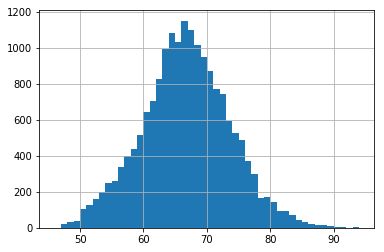

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
df_teams['Overall'].hist(bins=48)

In [47]:
df_teams['Overall'].describe()

count    17918.000000
mean        66.236801
std          6.929243
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

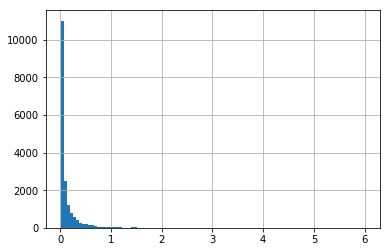

In [48]:
df_teams['Overvalue Ratio'].hist(bins=100)

In [49]:
df_teams['Overvalue Ratio'].describe()

count    17918.000000
mean         0.132839
std          0.263323
min          0.012195
25%          0.019231
50%          0.046875
75%          0.128571
max          6.010638
Name: Overvalue Ratio, dtype: float64

C:\Users\jhump\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


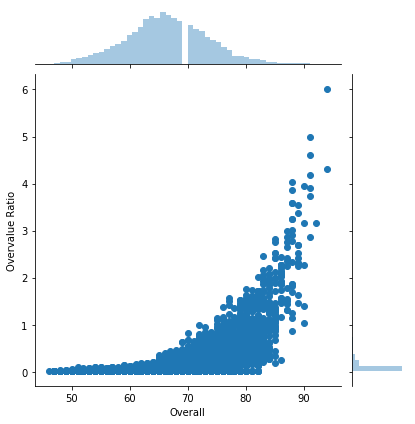

In [50]:
# relationship between 'Overall' and 'Performance_ratio'
# this shows that there are players with `Overall` in lower 80s that are Undervalued
import seaborn as sns
sns.jointplot(x='Overall', y='Overvalue Ratio', data=df_teams)

In [92]:
# dataframe with features for correlation function
df_attributes = df_teams[['Field Position Num', 'Overall', 'Potential', 'Crossing', 'Finishing', 
                          'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                          'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                          'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
                          'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 
                          'Vision', 'Penalties', 'Composure', 'Marking']]
# name of player
p_name = 'C. Immobile'

# this gets index of player given a name
p_index = df_teams[df_teams['Name']==p_name].index.values[0]

# getting the 'Overall' and 'Potential' based on index or Name
p_overall = df_teams[df_teams['Name']==p_name].Overall.values[0]
p_potential = df_teams[df_teams['Name']==p_name].Potential.values[0]
p_position = df_teams[df_teams['Name']==p_name]['Field Position Num'].values[0]

# Wage for player passed in
p_wage = df_teams[df_teams['Name']==p_name].Wage.values[0]

p_attributes = df_attributes.iloc[p_index]

# club of selected player
p_club = df_teams[df_teams['Name']==p_name]['Club'].values[0]

# filtering attributes for overvalued:
filtered_attributes = df_attributes[(df_attributes['Overall'] > p_overall-10) 
                                    & (df_attributes['Potential'] > p_potential-10)
                                    & (df_attributes['Field Position Num'] == p_position)]

#filtering attributes for weaker players:
filtered_weak_attributes = df_attributes[(df_attributes['Overall'] > p_overall) 
                                    & (df_attributes['Potential'] > p_potential)]

In [93]:
# Uses this to replace overpaid players -  top 5 suggestes
suggested_players = filtered_attributes.corrwith(p_attributes, axis=1)
suggested_players = suggested_players.sort_values(ascending=False).head(5)
suggested_players

523    0.916458
267    0.915041
329    0.909124
272    0.897876
719    0.897423
dtype: float64

In [94]:
suggested_players_tuple = list(zip(suggested_players,suggested_players.index))
suggested_p_index = sorted(suggested_players_tuple, reverse=True)[0][1]
suggested_p_index

523

In [54]:
# Budget remaining when picking top suggested player
# (Wage of overpaid player - Wage of suggested player)
budget_remaining = (p_wage - df_teams[df_teams.index==suggested_p_index].Wage.values[0])*1000
budget_remaining

70000

In [55]:
# Use this for replacing weaker players - top 5 suggestions
suggested_strong_players = filtered_weak_attributes.corrwith(p_attributes, axis=1)
suggested_strong_players = suggested_players.sort_values(ascending=False).head(5)
suggested_strong_players

523    0.916458
267    0.915041
329    0.909124
272    0.897876
719    0.897423
dtype: float64

In [95]:
df_teams[df_teams.Name == 'L. Messi']

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Field Position,Overvalue Ratio,Field Position Num
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Not Loaned,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack,6.010638,0


In [96]:
df_teams[df_teams.index == 48]['Name']

48    C. Immobile
Name: Name, dtype: object

In [58]:
# this gets index of player given a name
df_teams[df_teams['Name']=='C. Immobile'].index.values[0]

48

In [59]:
# getting the 'Overall' and 'Potential' based on index or Name
df_teams[df_teams['Name'] == 'C. Immobile'].Overall.values[0]
df_teams[df_teams['Name'] == 'C. Immobile'].Potential.values[0]

87

In [60]:
# filtering for a player with wage lower than overvalued player
df_teams[df_teams['Name'] == 'C. Immobile'].Wage.values[0]
#df_teams[df_teams['Wage'] < 'C. Immobile'].Overall.values[0]

115

In [61]:
# finding player based on index
suggested_player_index = df_teams[df_teams['Name']==p_name].index.values[0]

In [305]:
# 2019-03-13 0430hrs PST
# Create function that uses above 'suggested' variables to output x players to potentially obtain by trade
# for df_attributes dataframe, see above cells


def get_suggested_trades(club):  # player argument changed to 'club', after get_club_players refactored
    trades_p1 = []  # this will be the output object that club_suggested_changes receives/uses
    trades_p2 = []

    if club in df_teams.Club.values or type(club) == list:  # either gets existing club from db, or uses custom list
        all_players, top_2, bottom_2 = get_club_players(club)  # df_club_list, df_top_2_players, df_bottom_2_players
        
        for player in top_2.Name:
            player_dict = {}
            cols = ['Name', 'Position', 'Overvalue Ratio', 'Overall Rating', 'Potential Rating']
            input_player_index = df_teams[df_teams['Name']==player].index.values[0]
            player_attributes = df_attributes.iloc[input_player_index]
        
            # filtering attributes logic:
            filtered_attributes = df_attributes[(df_attributes['Overall'] > p_overall-10) 
                                            & (df_attributes['Potential'] > p_potential-10)
                                            & (df_attributes['Field Position Num'] == p_position)]

            # use filter logic to replace overpaid players - top 5 suggested
            # incorporate this: df_teams[df_teams.index == 48]['Name']  # 48 index is example only
            suggested_players = filtered_attributes.corrwith(player_attributes, axis=1)
            print('player:', player)
            suggested_players = suggested_players.sort_values(ascending=False).head(5)
            print('suggested_players:\n', suggested_players)  # note: suggested_players is a pandas Series
            suggested_players_tup_list = list(zip(suggested_players,suggested_players.index))
                        
#             for idx in suggested_players.index:
#                 player_list.append([df_teams[df_teams.index == idx].Name,
#                                   df_teams[df_teams.index == idx].Position,
#                                   df_teams[df_teams.index == idx]['Overvalue Ratio'],
#                                   df_teams[df_teams.index == idx].Overall,
#                                   df_teams[df_teams.index == idx].Potential])
#             player_df = pd.DataFrame(data=player_list)
#             print('\nplayer_df:', player_df, '\n')

            player_dict[player] = suggested_players
            print('\nplayer_dict:', player_dict)

In [306]:
# Test with 'Juventus'

get_suggested_trades('Juventus')

Found Juventus
player: Cristiano Ronaldo
suggested_players:
 139    0.747739
824    0.736955
762    0.691765
818    0.660302
485    0.657216
dtype: float64

player_dict: {'Cristiano Ronaldo': 139    0.747739
824    0.736955
762    0.691765
818    0.660302
485    0.657216
dtype: float64}
player: G. Chiellini
suggested_players:
 151    0.908061
272    0.898944
329    0.877801
330    0.877792
179    0.864682
dtype: float64

player_dict: {'G. Chiellini': 151    0.908061
272    0.898944
329    0.877801
330    0.877792
179    0.864682
dtype: float64}


In [307]:
# 2019-03-13 0430hrs PST
# Create function that uses above 'suggested' variables to output x players to potentially obtain by trade
# for df_attributes dataframe, see above cells


def get_suggested_trades(club):  # player argument changed to 'club', after get_club_players refactored
    trades_p1 = []  # this will be the output object that club_suggested_changes receives/uses
    trades_p2 = []

    if club in df_teams.Club.values or type(club) == list:  # either gets existing club from db, or uses custom list
        all_players, top_2, bottom_2 = get_club_players(club)  # df_club_list, df_top_2_players, df_bottom_2_players
        
        # looping throught 2 player names in 'top_2'
        for idx, player in enumerate(top_2.Name):
            # getting 'index' for player in 'df_teams' DF
            input_player_index = df_teams[df_teams['Name']==player].index.values[0]
            # getting 'row' for same player in 'df_attributes' using index (No 'Name' col in 'df_attributes')
            player_attributes = df_attributes.iloc[input_player_index]
        
            # filtering attributes logic:
            filtered_attributes = df_attributes[(df_attributes['Overall'] > p_overall-10) 
                                            & (df_attributes['Potential'] > p_potential-10)
                                            & (df_attributes['Field Position Num'] == p_position)]

            # use filter logic to suggest replacement players - top 5 suggested
            # gives DF of with all indexes and correlation ratio
            suggested_players = filtered_attributes.corrwith(player_attributes, axis=1)
            # Top 2 suggested players (most positively correlated)
            suggested_players = suggested_players.sort_values(ascending=False).head(5)
            #suggested_players_tuple = list(zip(suggested_players,suggested_players.index))
            #suggested_p_index = sorted(suggested_players_tuple, reverse=True)
            
            cols = ['Name', 'Position', 'Overvalue Ratio', 'Overall', 'Potential']
            for i, corr in enumerate(suggested_players):
                if idx == 0:
                    # player 1 - suggested trades
                    trades_p1.append(df_teams[df_teams.index==suggested_players.index[i]][cols].values)
                else:
                    # player 2 - suggested trades                 
                    trades_p2.append(df_teams[df_teams.index==suggested_players.index[i]][cols].values)

    cols1 = ['Name', 'Position', 'Overvalue Ratio', 'Overall Rating', 'Potential Rating']
    trades_p1_df = pd.DataFrame(np.row_stack(trades_p1), columns=cols1)
    trades_p2_df = pd.DataFrame(np.row_stack(trades_p2), columns=cols1)
    print(trades_p1_df, '\n')
    print(trades_p2_df)

In [308]:
# Test get_suggested_trades, using 'Juventus' as an example

get_suggested_trades('Juventus')

Found Juventus
           Name Position Overvalue Ratio Overall Rating Potential Rating
0  M. Mandžukić       ST         1.90476             84               84
1       E. Sala       ST        0.397436             78               78
2   W. Weghorst       LS        0.615385             78               80
3  L. Pavoletti       RS             0.5             78               78
4  Sergi Enrich       RS           0.425             80               80 

             Name Position Overvalue Ratio Overall Rating Potential Rating
0        A. Gómez       LS        0.630952             84               84
1  Jonathan Viera       LF        0.378049             82               82
2       H. Lozano       LS        0.271605             81               86
3         Morales       LS        0.407407             81               81
4       S. Gnabry       ST          1.0241             83               88


In [101]:
# See comment line inside of function just below


def get_replacement_players(club):
    '''Gets 2 lowest-rated players, and suggests four possible replacements.'''
    replacements_p1 = []  # this will be the output object that club_suggested_changes receives/uses
    replacements_p2 = []

    if club in df_teams.Club.values or type(club) == list:  # either gets existing club from db, or uses custom list
        all_players, top_2, bottom_2 = get_club_players(club)  # df_club_list, df_top_2_players, df_bottom_2_players
        
        for player in bottom_2.Name:
            input_player_index = df_teams[df_teams['Name']==player].index.values[0]
            player_attributes = df_attributes.iloc[input_player_index]
        
            # filtering attributes logic for weaker players:
            filtered_weak_attributes = df_attributes[  # (df_attributes['Overall'] > p_overall)
                                       (df_attributes['Overall'] < 87) 
                                       & (df_attributes['Potential'] > p_potential)
                                       & (df_attributes['Potential'] < 89)
                                       & (df_attributes['Field Position Num'] == p_position)]
            
            # incorporate this: df_teams[df_teams.index == 48]['Name']  # 48 index is example only
            suggested_players = filtered_weak_attributes.corrwith(player_attributes, axis=1)
            suggested_players = suggested_players.sort_values(ascending=False).head(2)
            suggested_players_tuple = list(zip(suggested_players,suggested_players.index))
            suggested_p_index = sorted(suggested_players_tuple, reverse=True)
                
            for p_corr_index in suggested_p_index:
                # replacements = [replacements_p1, replacements_p2]
                if len(replacements_p1) < len(suggested_p_index):
                    replacements_p1.append(df_teams[df_teams.index==p_corr_index[1]].Name.values[0])
                else:
                    replacements_p2.append(df_teams[df_teams.index==p_corr_index[1]].Name.values[0])
                
        # print('Input player is', player)
        # print('Suggested players to buy as replacements:\n', replacements, '\n')
        replacements_p1 = pd.DataFrame(replacements_p1, columns=['Name'])
        print('replacements_p1:\n', replacements_p1, '\n')
        replacements_p2 = pd.DataFrame(replacements_p2, columns=['Name'])
        print('replacements_p2:\n', replacements_p2)


In [102]:
# Test get_replacement_players, using 'Juventus' as an example

get_replacement_players('Juventus')

Found Juventus
replacements_p1:
           Name
0    S. Gnabry
1  P. Pellegri 

replacements_p2:
           Name
0    S. Gnabry
1  P. Pellegri


In [ ]:
# Create function that receives club string object and returns
# pandas object with suggested trades of overvalued players plus replacements
# of lowest rated players for that club


def club_suggested_changes(club):
    '''This function takes as input a club and gives as output x players.'''
    changes_suggested = []  # should ultimately be a pandas object
    
    for player_tup in get_club_players(club):  # iterates descending sorted [by PR] list of tuples for 2 players
        changes_suggested.append(get_suggested_trades(player_tup[0]))
    
    changes_suggested = pd.DataFrame(changes_suggested)  
    # should be able to send to JSON with 'changes_suggested = pd.to_json(changes_suggested)'
    return changes_suggested